In [ ]:
from google.colab import drive
drive.mount('/content/drive')





Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/transactions.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,8,CASH_OUT,158007.12,C424875646,0.00,0.00,C1298177219,474016.32,1618631.97,0
1,236,CASH_OUT,457948.30,C1342616552,0.00,0.00,C1323169990,2720411.37,3178359.67,0
2,37,CASH_IN,153602.99,C900876541,11160428.67,11314031.67,C608741097,3274930.56,3121327.56,0
3,331,CASH_OUT,49555.14,C177696810,10865.00,0.00,C462716348,0.00,49555.14,0
4,250,CASH_OUT,29648.02,C788941490,0.00,0.00,C1971700992,56933.09,86581.10,0


In [ ]:
import numpy as np


import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
plt.switch_backend('Agg')

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



In [ ]:
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

print('Libraries imported successfully')

Libraries imported successfully


In [ ]:
file_path ='/content/drive/MyDrive/transactions.csv'
df =pd.read_csv(file_path,encoding='ascii', delimiter=',')


print('Data loaded successfully. Head of the data:')
print(df.head())
print('\nData Info:')
print(df.info())

Data loaded successfully. Head of the data:
   step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     8  CASH_OUT  158007.12   C424875646           0.00            0.00   
1   236  CASH_OUT  457948.30  C1342616552           0.00            0.00   
2    37   CASH_IN  153602.99   C900876541    11160428.67     11314031.67   
3   331  CASH_OUT   49555.14   C177696810       10865.00            0.00   
4   250  CASH_OUT   29648.02   C788941490           0.00            0.00   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0  C1298177219       474016.32      1618631.97        0  
1  C1323169990      2720411.37      3178359.67        0  
2   C608741097      3274930.56      3121327.56        0  
3   C462716348            0.00        49555.14        0  
4  C1971700992        56933.09        86581.10        0  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 10 columns):
 #   Column          Non-Nul

In [15]:
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)


initial_shape = df.shape
df.drop_duplicates(inplace=True)
final_shape =df.shape
print(f'Initial shape:{initial_shape} ,after dropping duplicates:{final_shape}')

Missing values in each column:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64
Initial shape:(199999, 10) ,after dropping duplicates:(199999, 10)


In [16]:
print('Descriptive statistics:')
print(df.describe())

print('\nTransaction type counts:')
print(df['type'].value_counts())

Descriptive statistics:
                step        amount  oldbalanceOrg  newbalanceOrig  \
count  199999.000000  1.999990e+05   1.999990e+05    1.999990e+05   
mean      243.289836  1.802425e+05   8.314361e+05    8.523333e+05   
std       141.800473  6.255482e+05   2.882314e+06    2.917352e+06   
min         1.000000  0.000000e+00   0.000000e+00    0.000000e+00   
25%       156.000000  1.338746e+04   0.000000e+00    0.000000e+00   
50%       238.000000  7.426695e+04   1.420100e+04    0.000000e+00   
75%       334.000000  2.086376e+05   1.078489e+05    1.449629e+05   
max       741.000000  5.204280e+07   5.039905e+07    4.039905e+07   

       oldbalanceDest  newbalanceDest        isFraud  
count    1.999990e+05    1.999990e+05  199999.000000  
mean     1.093644e+06    1.218886e+06       0.001410  
std      3.302878e+06    3.627192e+06       0.037524  
min      0.000000e+00    0.000000e+00       0.000000  
25%      0.000000e+00    0.000000e+00       0.000000  
50%      1.320572e+05   

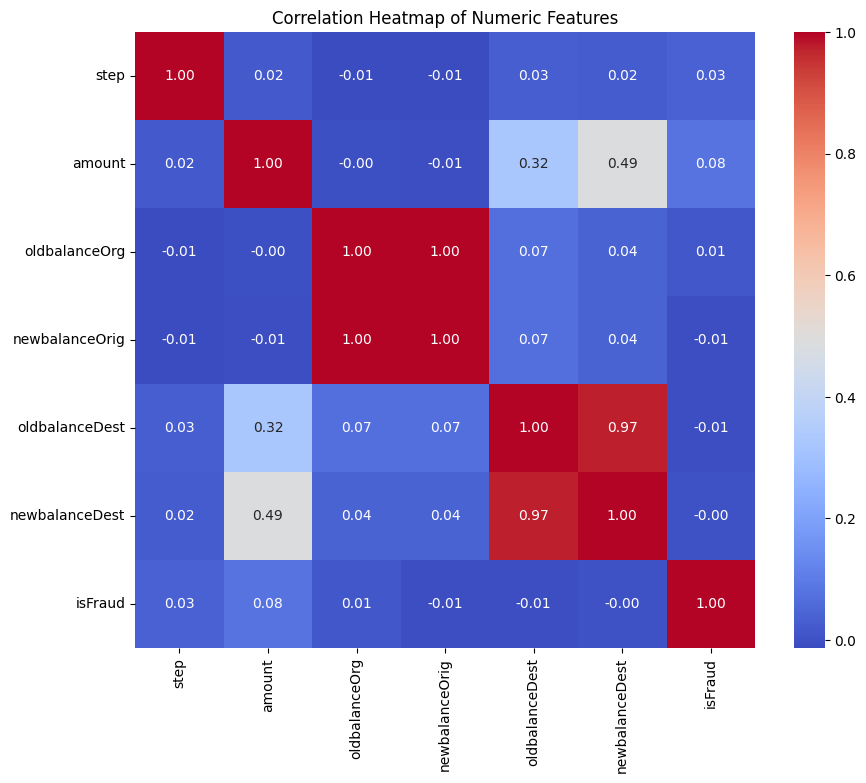

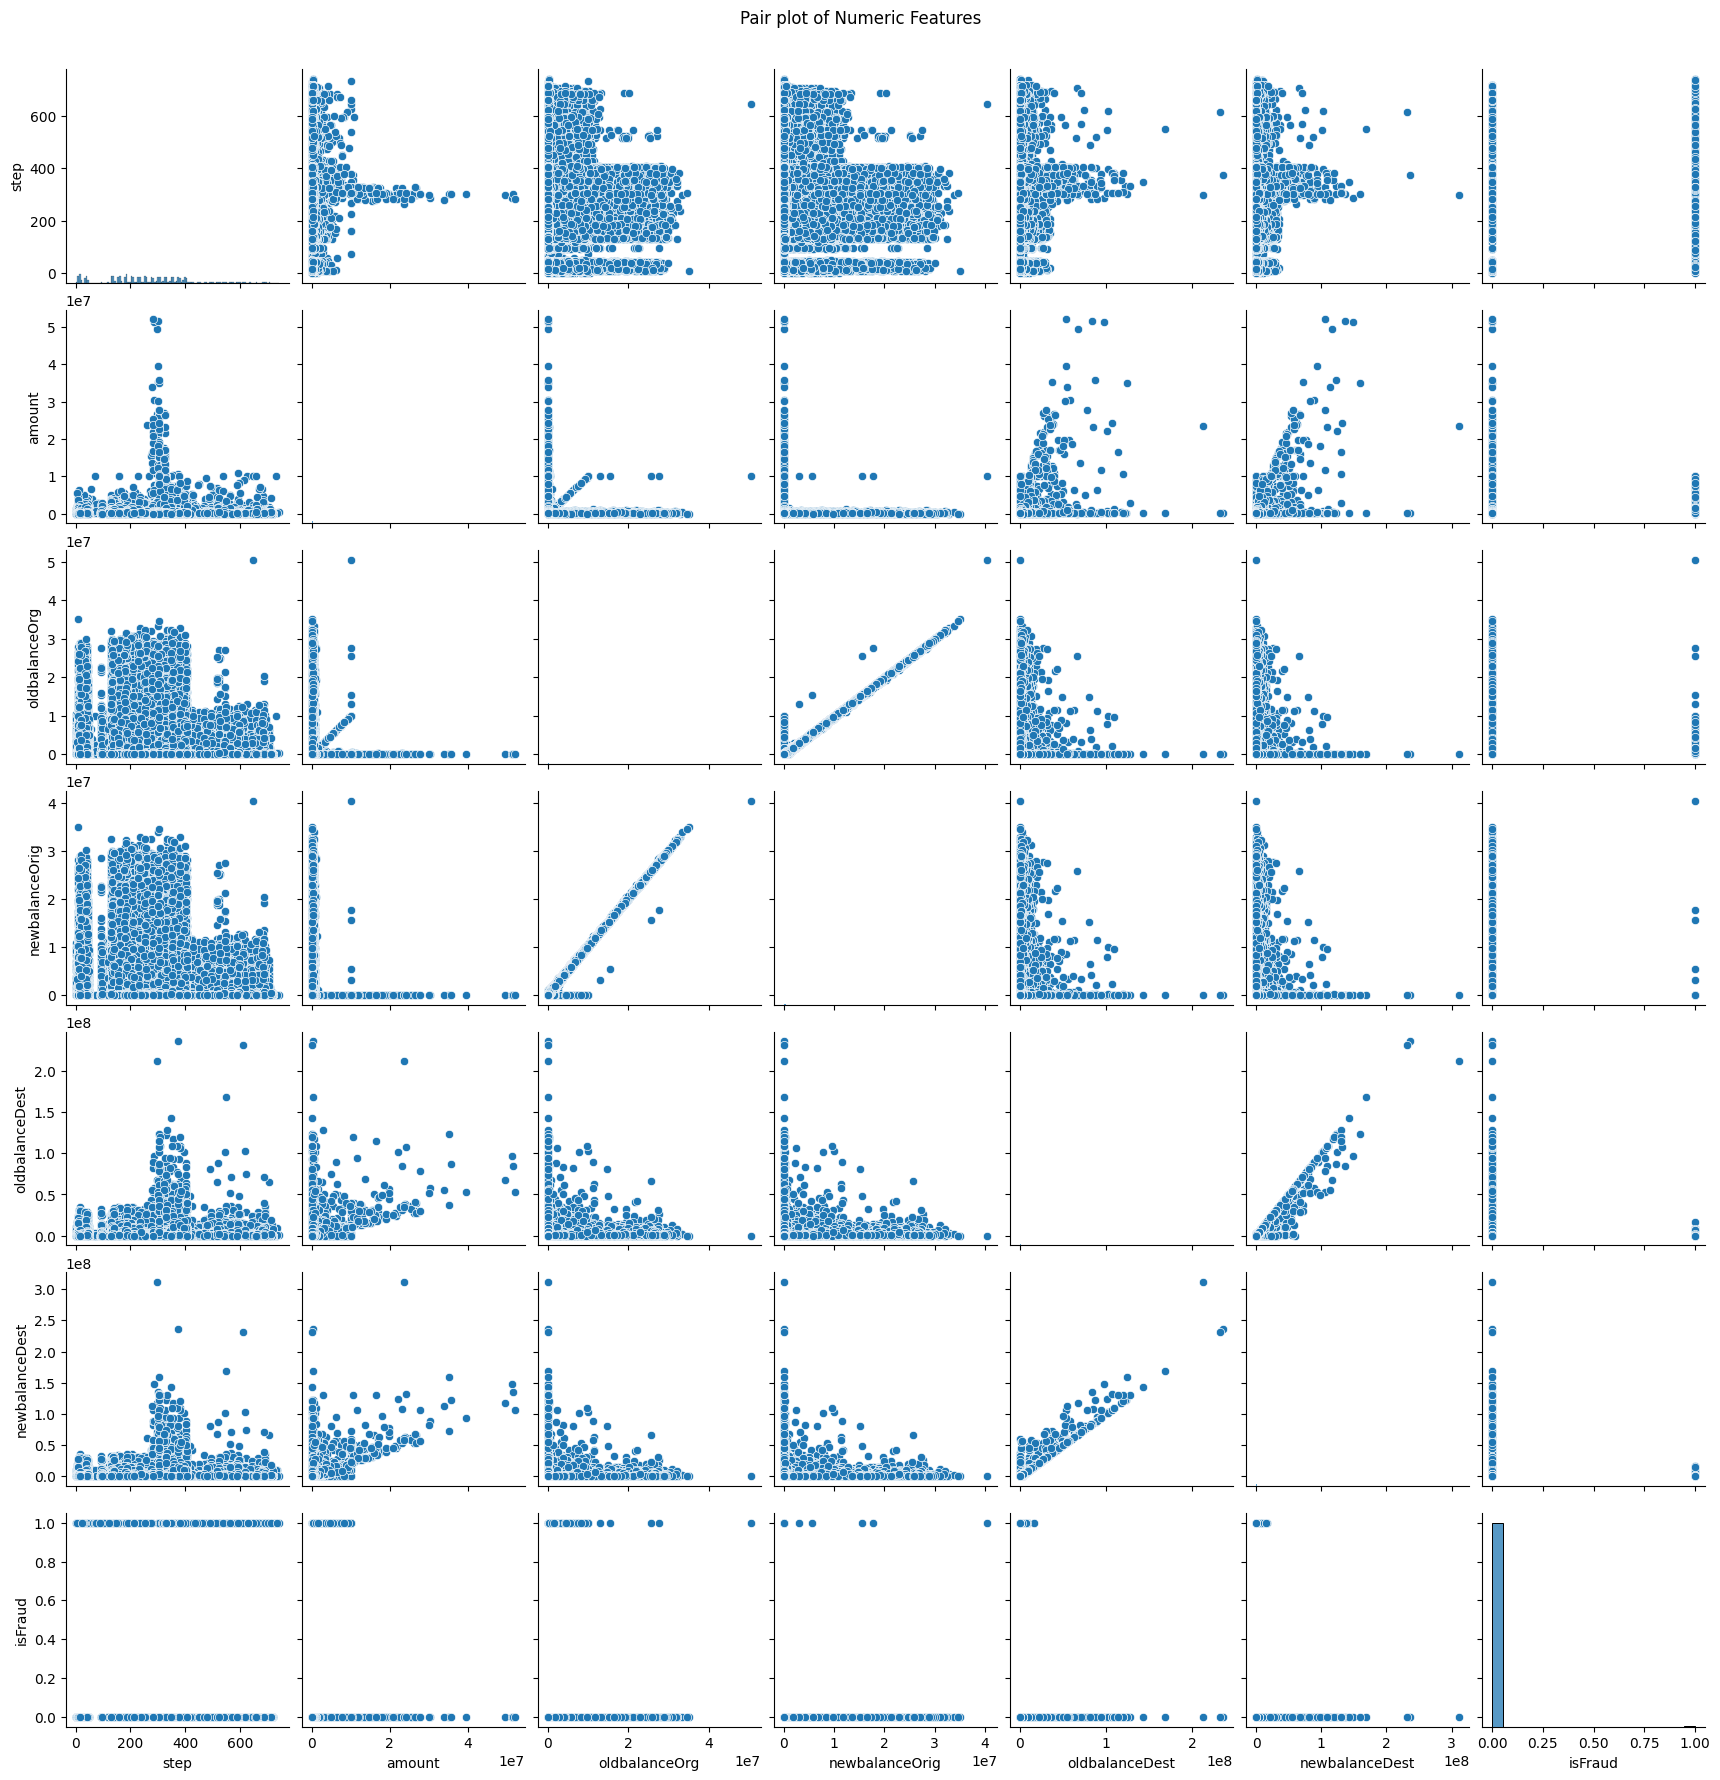

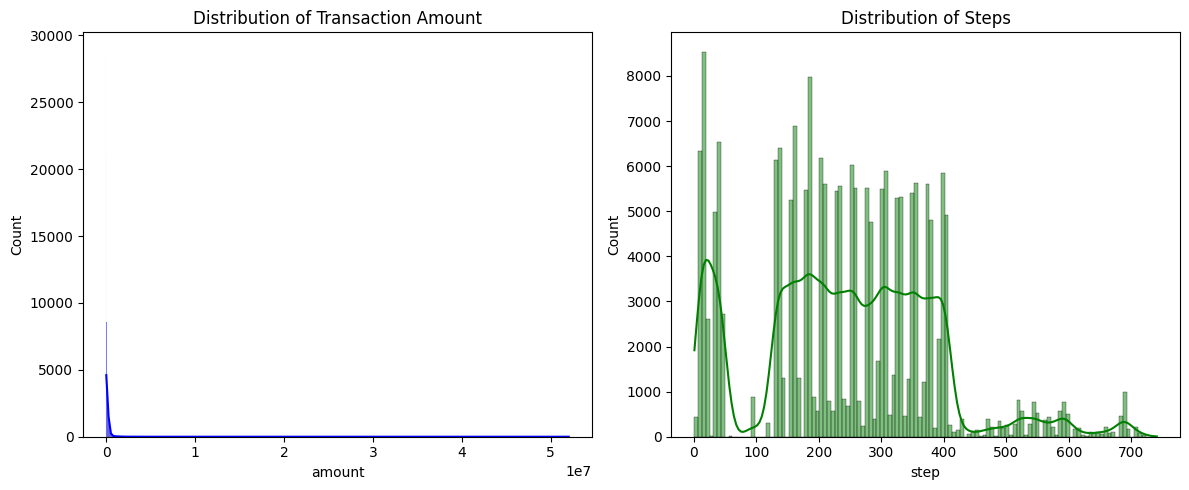

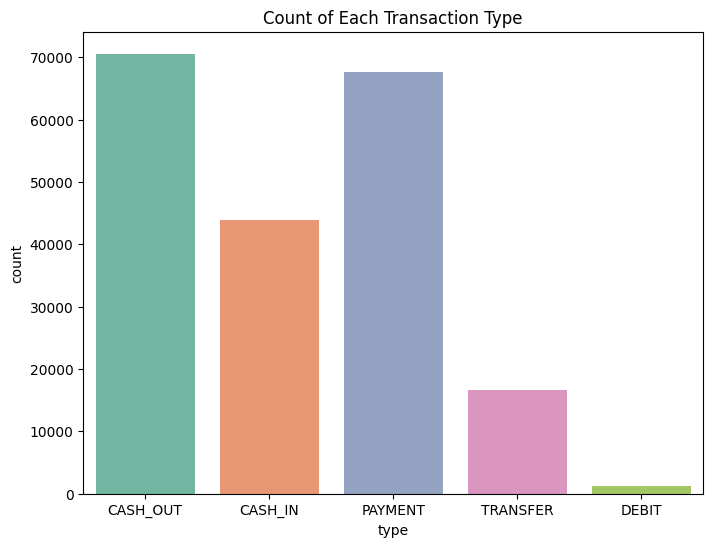

In [23]:
numeric_df =df.select_dtypes(include=[np.number])

if numeric_df.shape[1] >= 4:
  plt.figure(figsize=(10, 8))
  corr = numeric_df.corr()
  sns.heatmap(corr, annot=True, cmap='coolwarm',fmt='.2f')
  plt.title('Correlation Heatmap of Numeric Features')
  plt.show()
else:
    print('Not enugh numberic columns for a correlation heatmap.' )

sns.pairplot(numeric_df)
plt.suptitle('Pair plot of Numeric Features', y=1.02)
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['amount'], kde=True, color='blue')
plt.title('Distribution of Transaction Amount')

plt.subplot(1, 2, 2)
sns.histplot(df['step'], kde=True, color='green')
plt.title('Distribution of Steps')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Count of Each Transaction Type')
plt.show()



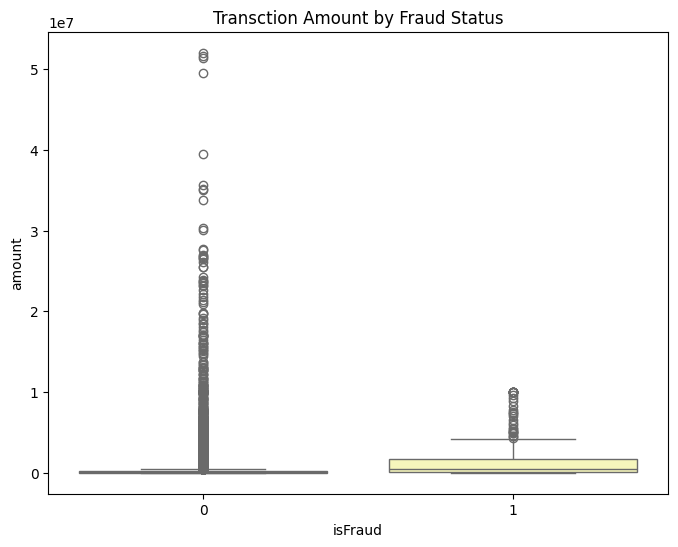

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='isFraud', y='amount', data=df, palette='Set3')
plt.title('Transction Amount by Fraud Status')
plt.show()

Prediction Accuracy: 0.9990


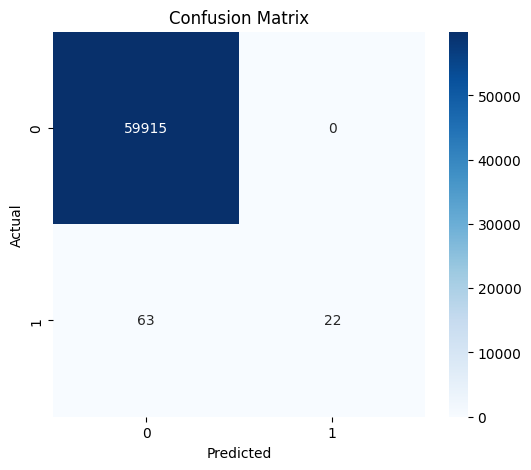


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59915
           1       1.00      0.26      0.41        85

    accuracy                           1.00     60000
   macro avg       1.00      0.63      0.71     60000
weighted avg       1.00      1.00      1.00     60000



In [25]:
df_model = df.copy()


df_model = pd.get_dummies(df_model, columns=['type'], drop_first=True)


X = df_model.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)
y = df_model['isFraud']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler =StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

y_pred = lr_model.predict(X_test_scaled)

acc=accuracy_score(y_test,y_pred)
print(f'Prediction Accuracy: {acc:.4f}')


conf_mat =confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

